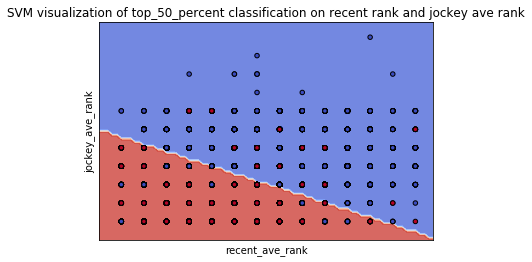

In [1]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy



def get_list(df = [] , col_type = ''):
    list_set = np.empty(0)
    for index, row in df.iterrows():
        #print(row[col_type])
        if not row[col_type] in list_set:
            list_set = np.append(list_set , row[col_type])
    return list_set

def get_data(name = ''):
    df = ""
    path = os.getcwd()
    direct='data'
    file=os.path.join(path,direct, name)
    #opencsv=""
    try:
        opencsv = open(os.path.join(path,direct,name), 'r')
        #print(opencsv)#find the race-result-horse file
    except:
        while opencsv != name:  # if the file cant be found if there is an error
            print("Could not open ", "file")
            opencsv = input("\nPlease try to open file again: ")
    else:
        with open(os.path.join(path,direct,name)) as f:
            feature_names = []#f.readline()
            #print(feature_names)
            reader = csv.reader(f)
            for row in reader:
                feature_names = row
                #print(feature_names)
                break
            df =  pd.read_csv(open(os.path.join(path,direct,name)), header=None, names = feature_names) #, na_values = ['WV-A' , 'WV'])
            df.drop(0, inplace = True)
    return df

def svm_visual():
    df = get_data('training.csv')
    
    mapping = np.array(list(map(int,df.loc[:,['finishing_position']].values.ravel())))
    
    
    df.loc[:,['finishing_position']] = mapping.reshape(-1,1)
    df["top_50_percent"] = ""
    
    for index, row in df.iterrows():
        if row["finishing_position"] < 7:
            df.loc[index ,["top_50_percent"]] = int(1)
        else:
            df.loc[index , ["top_50_percent"]] = int(0)
    
    #top_50 = df[df["finishing_position"] < 7]
    
    X = df.loc[:,['recent_ave_rank' , 'jockey_ave_rank']].values
    
    y = df.loc[:,['top_50_percent']].values.ravel()
    y=y.astype('int')
    #print(y.shape)
    
    svc_model = svm.SVC(kernel='linear', C=1.0)
    
    svc_model.fit(X,y)
    
    X0, X1 = np.array(list(map(int,X[:, 0]))), np.array(list(map(int,X[:, 1])))
    xx, yy = make_meshgrid(X0, X1 , .2)
    
    Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.8)
    
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #plt.xlim(xx.min(), xx.max()+1)
    #plt.ylim(yy.min(), yy.max()+1)
    plt.xlabel('recent_ave_rank')
    plt.ylabel('jockey_ave_rank')
    plt.xticks(())
    plt.yticks(())
    plt.title('SVM visualization of top_50_percent classification on recent rank and jockey ave rank')
    plt.show()
    

if __name__ == '__main__':
    
    svm_visual()